<a href="https://colab.research.google.com/github/athibhash5/myworkouts/blob/main/RegressionExamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Linear Regression

salary data

In [ ]:
import pandas as pd
data=pd.read_csv('/content/salary_data (2).csv')

In [ ]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
data.shape

(30, 2)

In [ ]:
data.isna().any()

YearsExperience    False
Salary             False
dtype: bool

In [ ]:
x=data.iloc[:,:1]
y=data.iloc[:,1]

In [ ]:
x.head(2)

,YearsExperience
0,1.1
1,1.3


In [ ]:
y.head(2)

0    39343
1    46205
Name: Salary, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()   # regressor > linear regression model object
regressor.fit(xtrain,ytrain)
ypred=regressor.predict(xtest)
print(ypred)

[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


In [ ]:
ytest

2      37731
28    122391
13     57081
10     63218
26    116969
24    109431
Name: Salary, dtype: int64

In [ ]:
#visualising training set results
import matplotlib.pyplot as plt

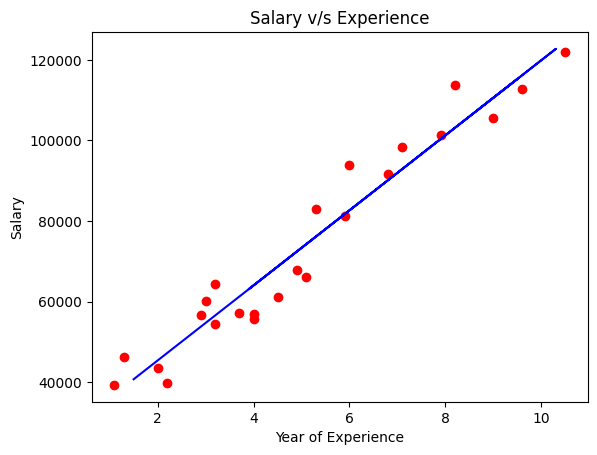

In [ ]:
plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtest,ypred,color='b') #to plot the blue line
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.title('Salary v/s Experience')
plt.show()

In [ ]:
print('coefficient of regression:',regressor.coef_)
print('y interccept:',regressor.intercept_)  #prints the y-intercept of the regression model.



coefficient of regression: [9312.57512673]
y interccept: 26780.09915062818


In [ ]:
from sklearn.metrics import mean_absolute_error
print('MAE:',mean_absolute_error(ytest,ypred))


MAE: 2446.1723690465055


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE:',mean_squared_error(ytest,ypred))

MSE: 12823412.298126549


In [ ]:
import numpy as np
print('RMES:',np.sqrt(mean_squared_error(ytest,ypred)))

RMES: 3580.979237321343


#2.Multiple Linear Regression

In [ ]:
import pandas as pd
data=pd.read_csv('/content/train-data.csv')

In [ ]:
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
data.shape

(6019, 14)

In [ ]:
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [ ]:
data.Name.value_counts()

Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1878, dtype: int64

In [ ]:
data.Location.value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [ ]:
data.Fuel_Type.value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [ ]:
data.Transmission.value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

In [ ]:
data.isna().any()

Unnamed: 0           False
Name                 False
Location             False
Year                 False
Kilometers_Driven    False
Fuel_Type            False
Transmission         False
Owner_Type           False
Mileage               True
Engine                True
Power                 True
Seats                 True
New_Price             True
Price                False
dtype: bool

In [ ]:
data.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

The pd.get_dummies function in the Pandas library is used for converting categorical variable(s) into dummy/indicator variables.
drop_first: Whether to drop the first level of each categorical variable to avoid multicollinearity. Default is False.

In [ ]:
data1=pd.get_dummies(data,columns=['Location','Fuel_Type','Transmission','Owner_Type'],drop_first=True)
data1.head()

,Unnamed: 0,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,Maruti Wagon R LXI CNG,2010,72000,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,...,1,0,0,0,0,0,1,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,...,0,1,1,0,0,0,1,0,0,0
2,2,Honda Jazz V,2011,46000,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,...,0,0,0,0,0,1,1,0,0,0
3,3,Maruti Ertiga VDI,2012,87000,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,...,0,0,1,0,0,0,1,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
data1.isnull().sum()*100/len(data)  # %of null values in each column to check whether it is >=25%


Unnamed: 0                    0.000000
Name                          0.000000
Year                          0.000000
Kilometers_Driven             0.000000
Mileage                       0.033228
Engine                        0.598106
Power                         0.598106
Seats                         0.697790
New_Price                    86.310018
Price                         0.000000
Location_Bangalore            0.000000
Location_Chennai              0.000000
Location_Coimbatore           0.000000
Location_Delhi                0.000000
Location_Hyderabad            0.000000
Location_Jaipur               0.000000
Location_Kochi                0.000000
Location_Kolkata              0.000000
Location_Mumbai               0.000000
Location_Pune                 0.000000
Fuel_Type_Diesel              0.000000
Fuel_Type_Electric            0.000000
Fuel_Type_LPG                 0.000000
Fuel_Type_Petrol              0.000000
Transmission_Manual           0.000000
Owner_Type_Fourth & Above

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 6019 non-null   int64  
 1   Name                       6019 non-null   object 
 2   Year                       6019 non-null   int64  
 3   Kilometers_Driven          6019 non-null   int64  
 4   Mileage                    6017 non-null   object 
 5   Engine                     5983 non-null   object 
 6   Power                      5983 non-null   object 
 7   Seats                      5977 non-null   float64
 8   New_Price                  824 non-null    object 
 9   Price                      6019 non-null   float64
 10  Location_Bangalore         6019 non-null   uint8  
 11  Location_Chennai           6019 non-null   uint8  
 12  Location_Coimbatore        6019 non-null   uint8  
 13  Location_Delhi             6019 non-null   uint8

In [ ]:
data1=data1.drop(['New_Price','Name','Unnamed: 0'],axis=1)
data1.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       6019 non-null   int64  
 1   Kilometers_Driven          6019 non-null   int64  
 2   Mileage                    6017 non-null   object 
 3   Engine                     5983 non-null   object 
 4   Power                      5983 non-null   object 
 5   Seats                      5977 non-null   float64
 6   Price                      6019 non-null   float64
 7   Location_Bangalore         6019 non-null   uint8  
 8   Location_Chennai           6019 non-null   uint8  
 9   Location_Coimbatore        6019 non-null   uint8  
 10  Location_Delhi             6019 non-null   uint8  
 11  Location_Hyderabad         6019 non-null   uint8  
 12  Location_Jaipur            6019 non-null   uint8  
 13  Location_Kochi             6019 non-null   uint8

In [ ]:
#converting unit to '' and null to '0'

In [ ]:
data1['Mileage']=data1['Mileage'].str.replace('km/kg','')
data1['Mileage']=data1['Mileage'].str.replace('kmpl','')
data1['Mileage']=data1['Mileage'].str.replace('null','0')

In [ ]:
data1['Engine']=data1['Engine'].str.replace('CC','')
data1['Engine']=data1['Engine'].str.replace('null','0')

In [ ]:
data1['Power']=data1['Power'].str.replace('bhp','')
data1['Power']=data1['Power'].str.replace('null','0')

In [ ]:
data1.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.6,998,58.16,5.0,1.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582,126.2,5.0,12.50,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.2,1199,88.7,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248,88.76,7.0,6.00,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.2,1968,140.8,5.0,17.74,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
data1.info()  #?? mileage datatype not changed to float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       6019 non-null   int64  
 1   Kilometers_Driven          6019 non-null   int64  
 2   Mileage                    6017 non-null   object 
 3   Engine                     5983 non-null   object 
 4   Power                      5983 non-null   object 
 5   Seats                      5977 non-null   float64
 6   Price                      6019 non-null   float64
 7   Location_Bangalore         6019 non-null   uint8  
 8   Location_Chennai           6019 non-null   uint8  
 9   Location_Coimbatore        6019 non-null   uint8  
 10  Location_Delhi             6019 non-null   uint8  
 11  Location_Hyderabad         6019 non-null   uint8  
 12  Location_Jaipur            6019 non-null   uint8  
 13  Location_Kochi             6019 non-null   uint8

In [ ]:
data1.isnull().any()

Year                         False
Kilometers_Driven            False
Mileage                       True
Engine                        True
Power                         True
Seats                         True
Price                        False
Location_Bangalore           False
Location_Chennai             False
Location_Coimbatore          False
Location_Delhi               False
Location_Hyderabad           False
Location_Jaipur              False
Location_Kochi               False
Location_Kolkata             False
Location_Mumbai              False
Location_Pune                False
Fuel_Type_Diesel             False
Fuel_Type_Electric           False
Fuel_Type_LPG                False
Fuel_Type_Petrol             False
Transmission_Manual          False
Owner_Type_Fourth & Above    False
Owner_Type_Second            False
Owner_Type_Third             False
dtype: bool

In [ ]:
data1['Mileage']=data1['Mileage'].astype(float)
data1['Power']=data1['Power'].astype(float)
data1['Engine']=data1['Engine'].astype(float)

In [ ]:
data1.isnull().sum()

Year                          0
Kilometers_Driven             0
Mileage                       2
Engine                       36
Power                        36
Seats                        42
Price                         0
Location_Bangalore            0
Location_Chennai              0
Location_Coimbatore           0
Location_Delhi                0
Location_Hyderabad            0
Location_Jaipur               0
Location_Kochi                0
Location_Kolkata              0
Location_Mumbai               0
Location_Pune                 0
Fuel_Type_Diesel              0
Fuel_Type_Electric            0
Fuel_Type_LPG                 0
Fuel_Type_Petrol              0
Transmission_Manual           0
Owner_Type_Fourth & Above     0
Owner_Type_Second             0
Owner_Type_Third              0
dtype: int64

In [ ]:
import numpy as np

In [ ]:
data1.loc[data1['Engine']==0,'Engine']=np.NaN
data1.loc[data1['Power']==0,'Power']=np.NaN

This line locates all rows in the 'Engine' column where the value is equal to 0 and replaces those values with NaN.

In [ ]:
data1.isnull().sum()

Year                           0
Kilometers_Driven              0
Mileage                        2
Engine                        36
Power                        143
Seats                         42
Price                          0
Location_Bangalore             0
Location_Chennai               0
Location_Coimbatore            0
Location_Delhi                 0
Location_Hyderabad             0
Location_Jaipur                0
Location_Kochi                 0
Location_Kolkata               0
Location_Mumbai                0
Location_Pune                  0
Fuel_Type_Diesel               0
Fuel_Type_Electric             0
Fuel_Type_LPG                  0
Fuel_Type_Petrol               0
Transmission_Manual            0
Owner_Type_Fourth & Above      0
Owner_Type_Second              0
Owner_Type_Third               0
dtype: int64

In [ ]:
data1['Mileage'].fillna(data1['Mileage'].mean(),inplace=True) #Fill missing values in 'Mileage' column with the mean
data1['Power'].fillna(data1['Power'].mean(),inplace=True)
data1['Engine'].fillna(data1['Engine'].mean(),inplace=True)


inplace=True: it modifies the original DataFrame (data1) without the need to create a new DataFrame.

In [ ]:
mode=data1['Seats'].mode()
mode

0    5.0
Name: Seats, dtype: float64

In [ ]:
data1['Seats'].fillna(5,inplace=True) #seat is a descreat variable
data1.isnull().sum()

Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Price                        0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
Fuel_Type_Diesel             0
Fuel_Type_Electric           0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Transmission_Manual          0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
dtype: int64

In [ ]:
data1.head(2)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,1,1,0,0,0,1,0,0,0


In [ ]:
fc=data1.pop('Price') # Remove the 'Price' column from the DataFrame and store it in the variable 'fc'

In [ ]:
data1.insert(0,'Price',fc) #Insert the 'Price' column at the first position in the DataFrame

In [ ]:
data1.head(2)

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,1.75,2010,72000,26.60,998.0,58.16,5.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,12.50,2015,41000,19.67,1582.0,126.20,5.0,0,0,0,...,0,1,1,0,0,0,1,0,0,0


In [ ]:
x=data1.iloc[:,1:] # Select all rows and columns from the second column onward in data1
x.head(2)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0


In [ ]:
y=data1.Price
y.head(2)

0     1.75
1    12.50
Name: Price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0,test_size=0.2)


In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(xtrain,ytrain)
ypred=regressor.predict(xtest)
ypred


array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [ ]:
from sklearn.metrics import r2_score,accuracy_score
print('r2_score:',r2_score(ytest,ypred))

r2_score: 0.988169515729126


#3.Polynomial Regression

In [3]:
import pandas as pd
data=[[1,0,0.002],[2,20,0.0012],[3,30,0.06]]
df=pd.DataFrame(data,columns=['sn','tem','pres'])
df

,sn,tem,pres
0,1,0,0.0020
1,2,20,0.0012
2,3,30,0.0600


In [34]:
x=df.iloc[:,1:2].values #1:2 after the comma refers to the second column
y=df.iloc[:,2].values
x

array([[-0.00645714],
       [ 0.02657143],
       [ 0.04308571]])

In [14]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x,y)
ypred=regressor.predict(x)

In [13]:
import matplotlib.pyplot as plt
t=df['tem'].tolist()
p=df['pres'].tolist()

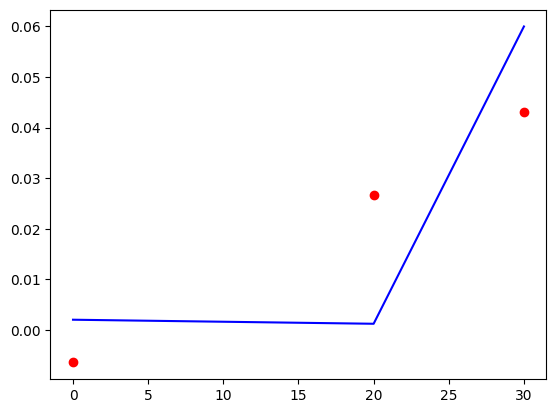

In [22]:
plt.plot(t,p,color='b')
plt.scatter(t,ypred,color='r')


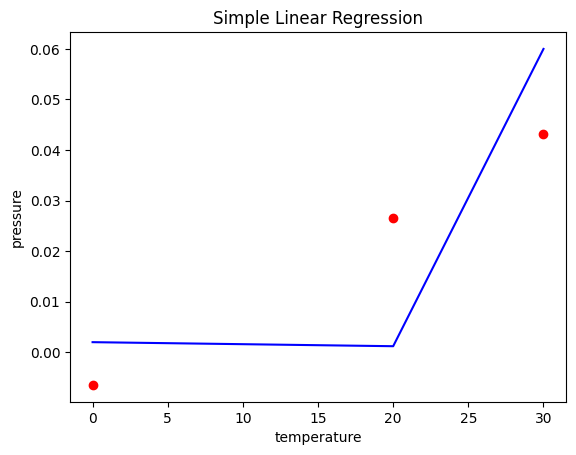

In [23]:
plt.plot(t,p,color='b')
plt.scatter(t,ypred,color='r')
plt.xlabel('temperature')
plt.ylabel('pressure')
plt.title('Simple Linear Regression')
plt.show()

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)
x_poly


array([[1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [1.0e+00, 2.0e+01, 4.0e+02, 8.0e+03],
       [1.0e+00, 3.0e+01, 9.0e+02, 2.7e+04]])

In [27]:
lin=LinearRegression()
lin.fit(x_poly,y)
y_poly=lin.predict(x_poly)
y_poly

array([0.002 , 0.0012, 0.06  ])

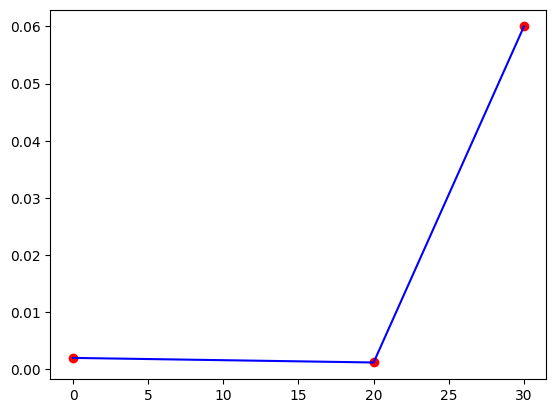

In [28]:
plt.plot(t,p,color='b')
plt.scatter(t,y_poly,color='r')

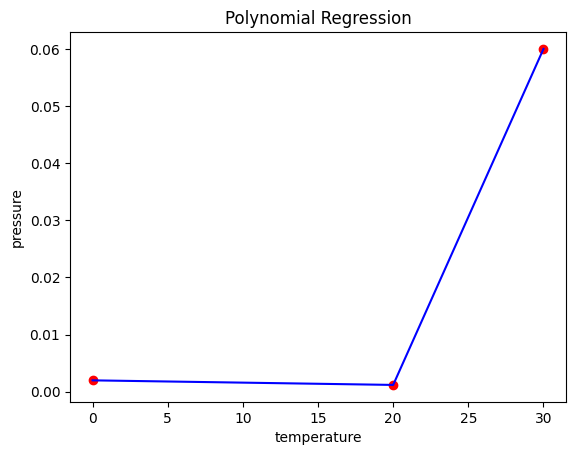

In [29]:
plt.plot(t,p,color='b')
plt.scatter(t,y_poly,color='r')
plt.xlabel('temperature')
plt.ylabel('pressure')
plt.title('Polynomial Regression')
plt.show()

In [32]:
df=pd.DataFrame({'actual value':y,'simp_regression':ypred,'poly_regression':y_poly})


In [33]:
from sklearn.metrics import r2_score

In [35]:
print('simple linear regression:',r2_score(y,ypred))
print('polynomial regression:',r2_score(y,y_poly))

simple linear regression: 0.5596684379460308
polynomial regression: 1.0


In [ ]:
#Normalization v/s Standardization

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [37]:
r=np.random.random([100,1])+3 #array containing 100 random numbers btw 0(include)and 1(exclude).+3> value btw 3 and 4
sd=StandardScaler()
sd.fit(r)
rescaled=sd.transform(r)

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(r)
re=scaler.transform(r)


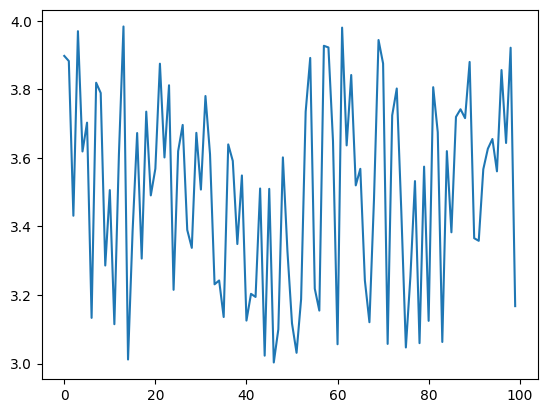

In [40]:
plt.plot(r)

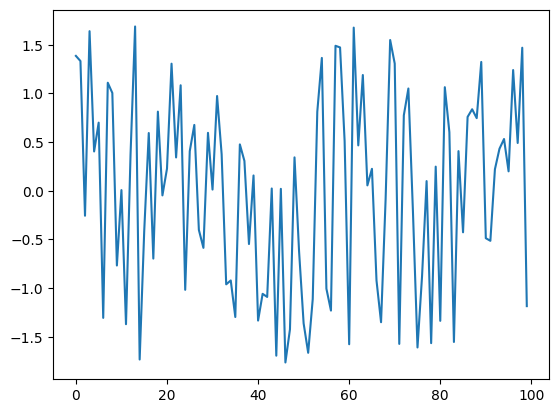

In [41]:
plt.plot(rescaled)

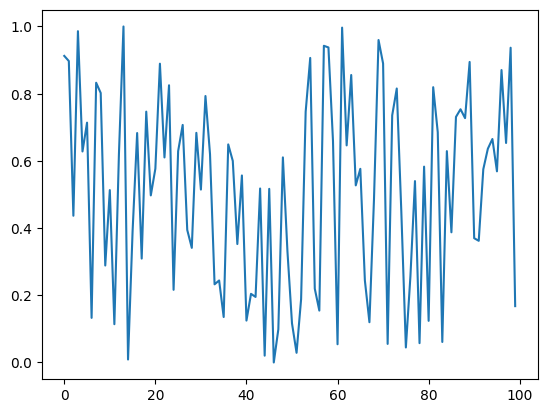

In [42]:
plt.plot(re)

#**Label Encoding** :changing data type
     

In [45]:
import pandas as pd
w=pd.read_csv("/content/weatherData (1).csv",header=None,names=['Outlook','Temperature','Humidity','Windy','Play'])

In [46]:
w.head()

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [48]:
w.shape

(14, 5)

In [51]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Windy        14 non-null     bool  
 4   Play         14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [47]:
w['Windy'].values

array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True, False,  True])

In [50]:
w['Windy'].value_counts()

False    8
True     6
Name: Windy, dtype: int64

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() #LabelEncoder is a utility class that can be used to encode categorical labels with numerical values


In [55]:
w.Outlook=le.fit_transform(w.Outlook)
w.head()

,Outlook,Temperature,Humidity,Windy,Play
0,2,hot,high,False,no
1,2,hot,high,True,no
2,0,hot,high,False,yes
3,1,mild,high,False,yes
4,1,cool,normal,False,yes


In [56]:
for i in w.columns:
  w[i]=le.fit_transform(w[i])
w.head()

,Outlook,Temperature,Humidity,Windy,Play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


In [58]:
w1=pd.read_csv("/content/weatherData (1).csv",header=None,names=['Outlook','Temperature','Humidity','Windy','Play'])

In [61]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
labelfit1=le1.fit(w1['Outlook'])
w1['Outlook']=labelfit1.transform(w1['Outlook'])
w1.head()

,Outlook,Temperature,Humidity,Windy,Play
0,2,hot,high,False,no
1,2,hot,high,True,no
2,0,hot,high,False,yes
3,1,mild,high,False,yes
4,1,cool,normal,False,yes


In [64]:
le2=LabelEncoder()
labelfit2=le2.fit(w1['Temperature'])
w1['Temperature']=labelfit2.transform(w1['Temperature'])
w1.head()

,Outlook,Temperature,Humidity,Windy,Play
0,2,1,high,False,no
1,2,1,high,True,no
2,0,1,high,False,yes
3,1,2,high,False,yes
4,1,0,normal,False,yes


In [65]:
le3=LabelEncoder()
labelfit3=le3.fit(w1['Humidity'])
w1['Humidity']=labelfit3.transform(w1['Humidity'])
w1.head()

,Outlook,Temperature,Humidity,Windy,Play
0,2,1,0,False,no
1,2,1,0,True,no
2,0,1,0,False,yes
3,1,2,0,False,yes
4,1,0,1,False,yes


In [66]:
le4=LabelEncoder()
labelfit4=le4.fit(w1['Windy'])
w1['Windy']=labelfit4.transform(w1['Windy'])
w1.head()

,Outlook,Temperature,Humidity,Windy,Play
0,2,1,0,0,no
1,2,1,0,1,no
2,0,1,0,0,yes
3,1,2,0,0,yes
4,1,0,1,0,yes


In [67]:
le5=LabelEncoder()
labelfit5=le5.fit(w1['Play'])
w1['Play']=labelfit5.transform(w1['Play'])
w1.head()

,Outlook,Temperature,Humidity,Windy,Play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


In [70]:
labelfit1.inverse_transform([2])
labelfit3.inverse_transform([0])
labelfit4.inverse_transform([0])

array([False])

inverse_transform method can be used to convert numerical representations back to the original categorical labels. The input to inverse_transform should be an array of numerical values that you want to convert.

In [81]:
labelfit1.transform(['sunny']).item(0)
labelfit3.transform(['high']).item(0)
labelfit4.transform(['True']).item(0)

1

In [72]:
w.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play'], dtype='object')

In [73]:
x=w1.iloc[:,:4]
x.head()

,Outlook,Temperature,Humidity,Windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0


In [74]:
y=w1.iloc[:,4]
y.head()

0    0
1    0
2    1
3    1
4    1
Name: Play, dtype: int64

In [78]:
from sklearn.neighbors import KNeighborsClassifier
k=5
model=KNeighborsClassifier(n_neighbors=k)
model.fit(x,y)


KNeighborsClassifier()

In [79]:
y_pred=model.predict([[labelfit1.transform(['sunny']).item(0),labelfit2.transform(['mild']).item(0),labelfit3.transform(['high']).item(0),labelfit4.transform(['True']).item(0)]])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [82]:
labelfit5.inverse_transform([0])

array(['no'], dtype=object)